In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from global_land_mask import globe
from scipy.optimize import curve_fit
import matplotlib as mpl
import netCDF4
mpl.rcParams['figure.dpi']= 300

In [3]:
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
#h = '/media/rakshith/Windows/Users/mraks/TGMS ERA 1959-2021, India only.nc'
ds = xr.open_dataset(h)

In [4]:
lon_grid, lat_grid = np.meshgrid(ds.longitude, ds.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [5]:
jjas = ds.time.dt.month.isin(range(6, 10)) #JJAS
clim = ds.sel(time=jjas)
clim2 = clim.groupby('time.year').mean('time')
clim3 = clim2.where(mask>0).mean(dim=['latitude', 'longitude'])

In [6]:
Pwat = clim3.tcwv
E = -86400*clim3.mer
P = 86400*28.96*(clim3.mtpr+clim3.mer)
Qdiv = clim3.mtnswrf + clim3.mtnlwrf + clim3.mslhf + clim3.msshf + clim3.msnswrf + clim3.msnlwrf
TGMS = np.divide(Qdiv, P)
rec = np.divide(1, Pwat)

# choose the input and output variables
x1, y1 = rec.values, TGMS.values
 
# define the true objective function
def objective(x, a, b, c):
	return a * x**2 + b * x + c

popt1, _ = curve_fit(objective, x1, y1)
# summarize the parameter values
a1, b1, c1 = popt1

print('y = %.5f * x\u00b2 + %.5f * x + %.5f' % (a1, b1, c1)) #ERA5


x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line1 = objective(x_line, a1, b1, c1)

y = 18620.28410 * x² + -673.59424 * x + 6.41241


Text(0.5, 1.0, 'JJAS average 1959-2021')

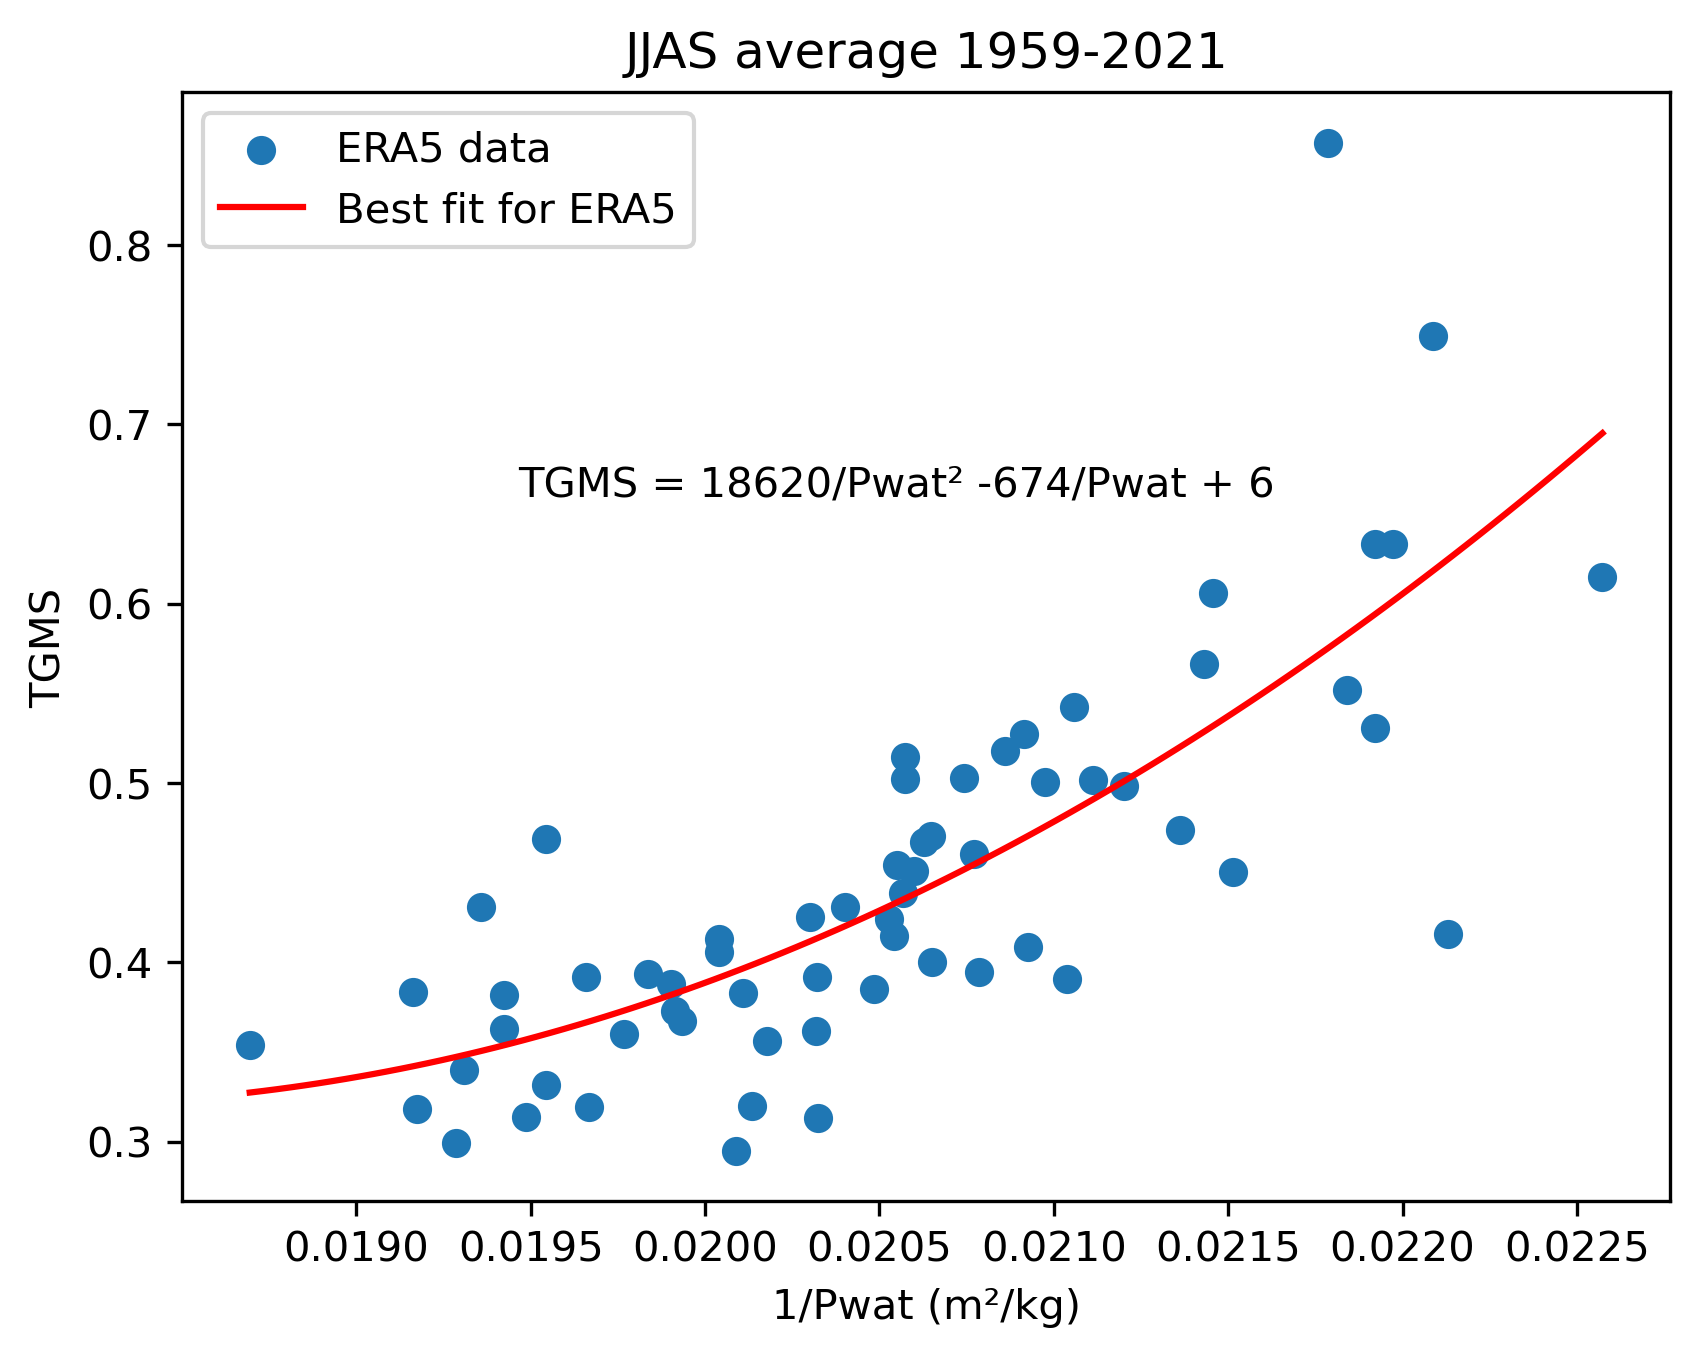

In [7]:
plt.scatter(rec, TGMS, label ='ERA5 data')
plt.plot(x_line, y_line1, color='red', label = "Best fit for ERA5")
plt.ylabel('TGMS')
plt.xlabel('1/Pwat (m\u00b2/kg)')
plt.figtext(0.3, 0.6, 'TGMS = %0.f/Pwat\u00b2 %0.f/Pwat + %0.f' %(a1, b1, c1))
plt.legend()
plt.title('JJAS average 1959-2021')

In [8]:
path = '/media/rakshith/Seagate Expansion Drive/IMD' #Daily dataset
fi = '/RFone_imd_rf_1x1_*.nc'
imd=xr.open_mfdataset(path+fi)

In [9]:
lat1, lat2, lon1, lon2 = 10, 30, 70, 90
imd2 = imd.sel(TIME=slice('1959', '2021'), LATITUDE=slice(lat1,lat2), LONGITUDE=slice(lon1,lon2))

months = imd2.TIME.dt.month.isin(range(6, 10))
imd3 = imd2.sel(TIME=months)
imd3 = imd3.groupby('TIME.year').mean('TIME')

#Mask for IMD
lon_grid, lat_grid = np.meshgrid(imd2.LONGITUDE, imd2.LATITUDE) #creating a land sea mask
imdmask = globe.is_land(lat_grid, lon_grid)

imd4 = imd3.where(imdmask>0).mean(dim=['LONGITUDE', 'LATITUDE']) #Spatial averaging over land points only

In [12]:
Pimd = 28.96*(imd4.RAINFALL.values+86400*clim3.mer)
TGMSnew = np.divide(Qdiv, Pimd)

x1, y1 = rec.values, TGMSnew

# define the true objective function
def objective(x, a, b, c):
	return a * x**2 + b * x + c

popt1, _ = curve_fit(objective, x1, y1)
# summarize the parameter values
a1, b1, c1 = popt1

print('y = %.5f * x\u00b2 + %.5f * x + %.5f' % (a1, b1, c1)) #ERA5


x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line1 = objective(x_line, a1, b1, c1)

y = 25785.81271 * x² + -984.64048 * x + 9.80512


Text(0.5, 1.0, 'JJAS average 1959-2021')

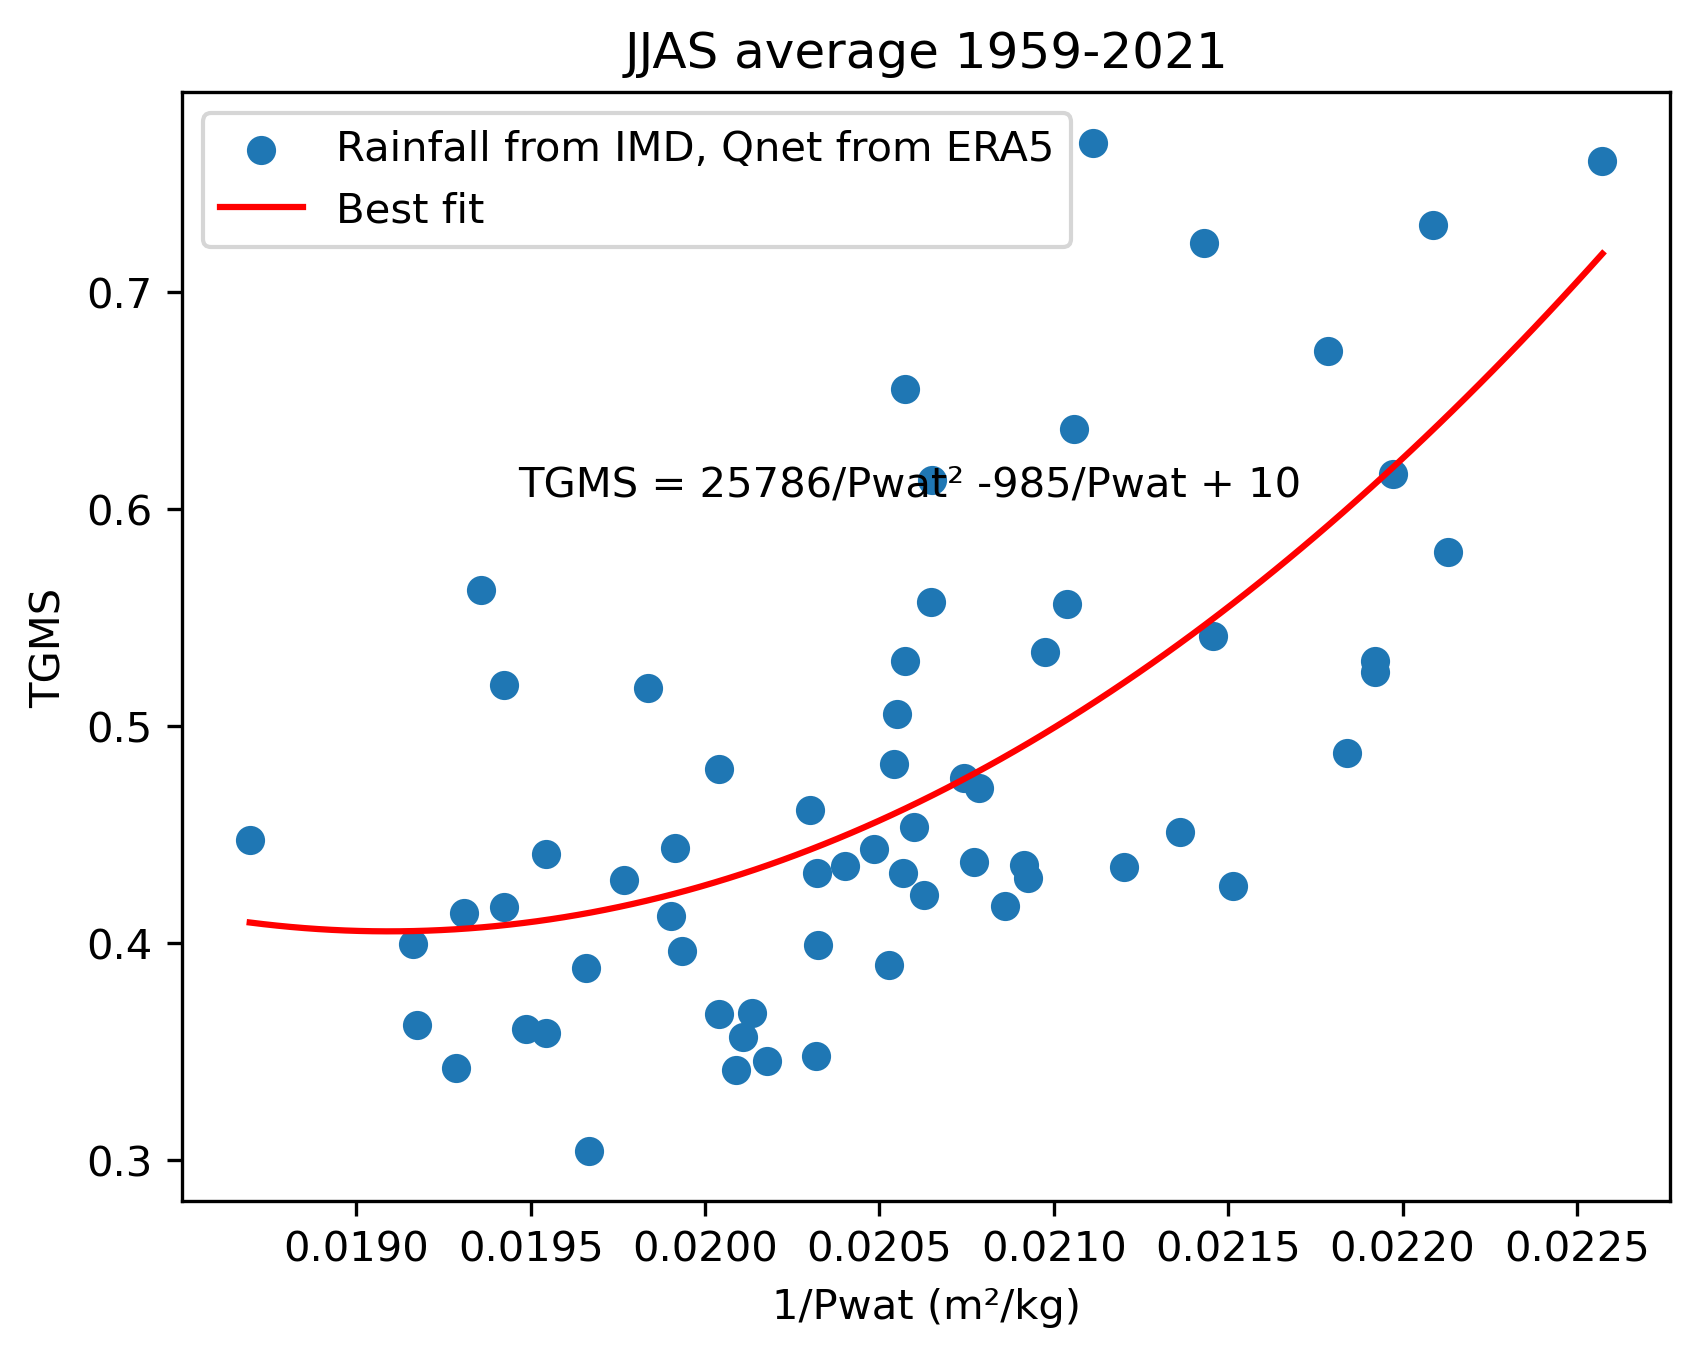

In [14]:
plt.scatter(rec, TGMSnew, label ='Rainfall from IMD, Qnet from ERA5')
plt.plot(x_line, y_line1, color='red', label = "Best fit")
plt.ylabel('TGMS')
plt.xlabel('1/Pwat (m\u00b2/kg)')
plt.figtext(0.3, 0.6, 'TGMS = %0.f/Pwat\u00b2 %0.f/Pwat + %0.f' %(a1, b1, c1))
plt.legend()
plt.title('JJAS average 1959-2021')

# Pwat and Qdiv, E are independent

Text(0.5, 1.0, 'JJAS means from ERA5, 1959-2021')

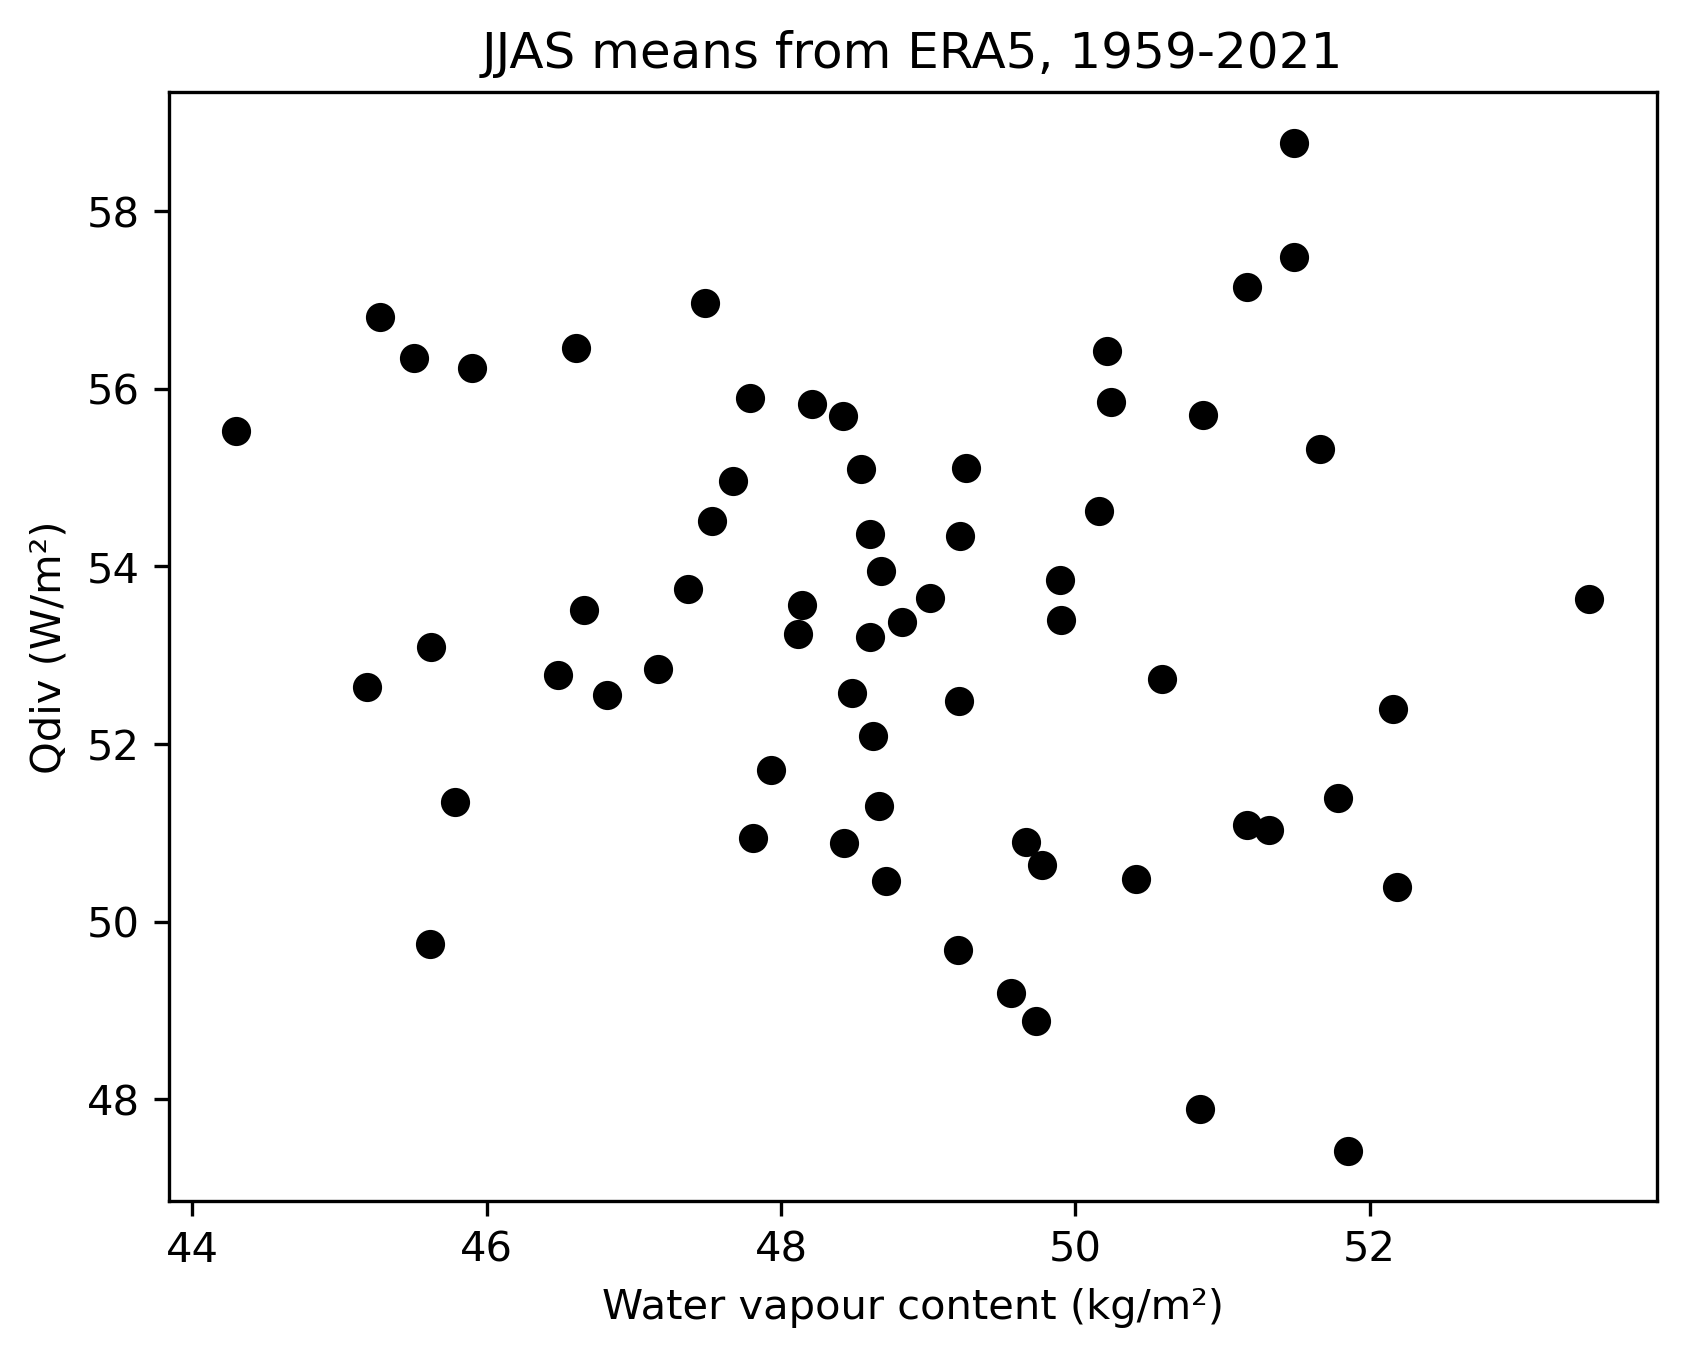

In [21]:
plt.scatter(Pwat, Qdiv, c='black')
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Qdiv (W/m\u00b2)')
plt.title('JJAS means from ERA5, 1959-2021')

Text(0.5, 1.0, 'JJAS means from ERA5, 1959-2021')

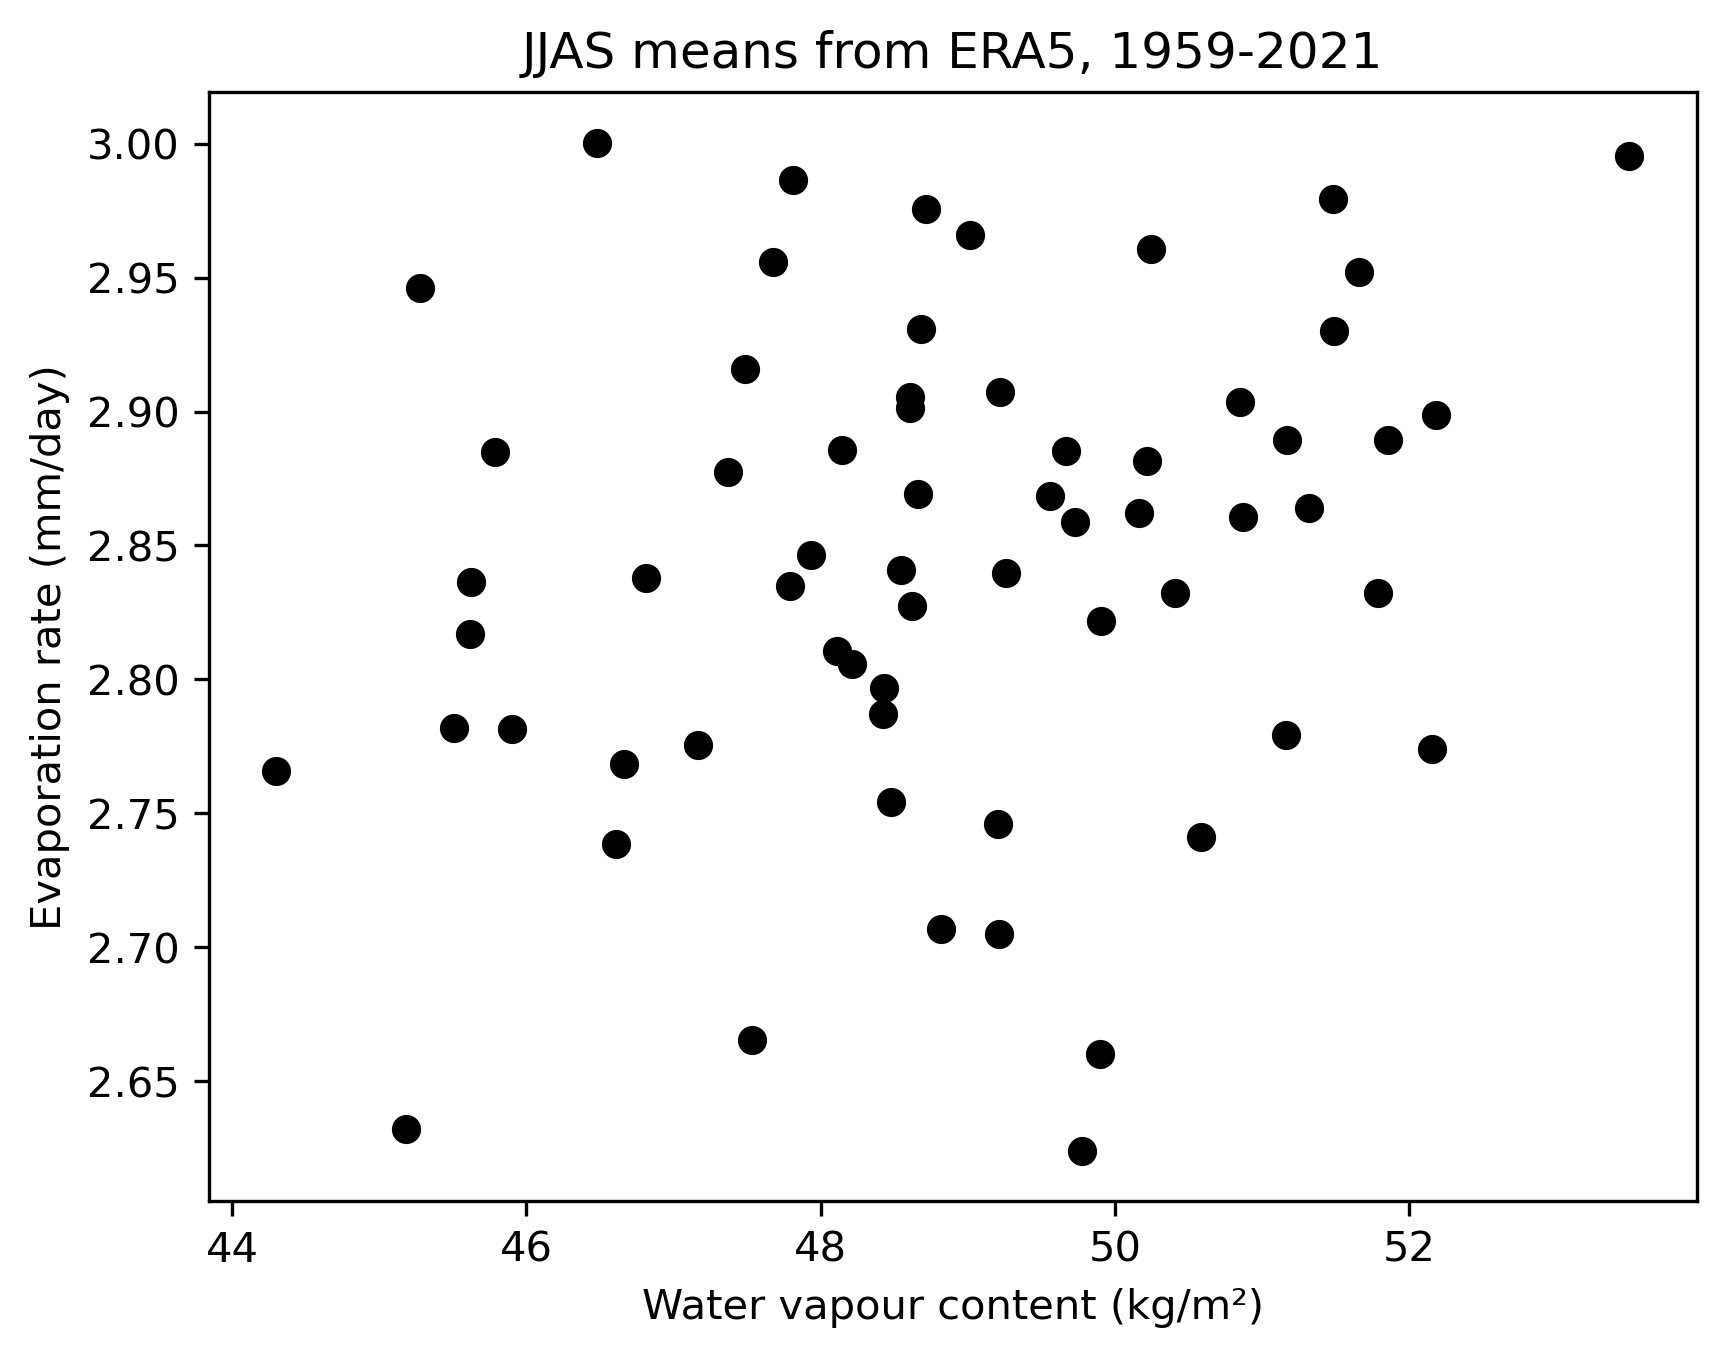

In [22]:
plt.scatter(Pwat, E, c='black')
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Evaporation rate (mm/day)')
plt.title('JJAS means from ERA5, 1959-2021')